In [1]:
## import statements ##
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train_tweets.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### Cleaning the data

In [5]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [6]:
import re
## example ## 
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ","ouch...junior is angryð#got7 #junior #yugyo..., @user")

'ouch   junior is angry     got7  junior  yugyo      '

In [7]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [8]:
train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)

In [9]:
train_data.head(10)

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr8


In [10]:
drop_features(['id','tweet'],train_data)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label               31962 non-null int64
processed_tweets    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(train_data["processed_tweets"],train_data["label"], test_size = 0.2, random_state = 42)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [15]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [16]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [17]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 33735)
(25569, 33735)


In [18]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [19]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 33735)
(6393, 33735)


# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [55]:
predLR=model1.predict(x_test_tfidf)

In [56]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predLR)
print(c_m)


[[5924   13]
 [ 317  139]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predLR)

0.9483810417644298

# Decision Tree 

In [58]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [59]:
predDT=model2.predict(x_test_tfidf)

In [60]:
c_m = confusion_matrix(y_test,predDT)
print(c_m)

[[5775  162]
 [ 169  287]]


In [61]:
accuracy_score(y_test,predDT)

0.9482246206788675

# Support Vector Machines

In [63]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train_tfidf,y_train)

SVC()

In [64]:
predSVC=model3.predict(x_test_tfidf)

In [65]:
c_m = confusion_matrix(y_test,predSVC)
print(c_m)

[[5924   13]
 [ 257  199]]


In [66]:
accuracy_score(y_test,predSVC)

0.9577663068981699

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [68]:
predRF = model.predict(x_test_tfidf)

In [69]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predRF)
c_m


array([[5900,   37],
       [ 221,  235]], dtype=int64)

In [70]:
accuracy_score(y_test,predRF)

0.9596433599249179

In [23]:
tp,fn,fp,tn = c_m[0][0],c_m[0][1],c_m[1][0],c_m[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.9939363314805457
precision =  0.9645308924485125
F1_score =  0.9790128577353795


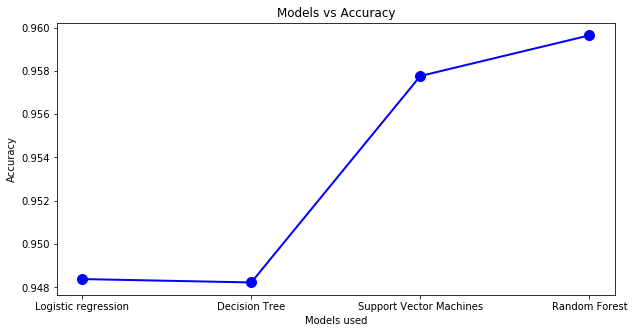

In [91]:
mod_accuracy=[accuracy_score(y_test,predLR),accuracy_score(y_test,predDT),accuracy_score(y_test,predSVC),accuracy_score(y_test,predRF)]
models=["Logistic regression","Decision Tree","Support Vector Machines","Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

# Preparing test data

In [74]:
test_data = pd.read_csv('test_tweets.csv')

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [27]:
test_data['processed_tweet'] = test_data['tweet'].apply(process_tweet)

In [28]:
test_data.head()

,id,tweet,processed_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...


In [29]:
drop_features(['tweet'],test_data)

In [30]:
train_counts = count_vect.fit_transform(train_data['processed_tweets'])
test_counts = count_vect.transform(test_data['processed_tweet'])

In [31]:
print(train_counts.shape)
print(test_counts.shape)

(31962, 38763)
(17197, 38763)


In [32]:
train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)

In [33]:
print(train_tfidf.shape)
print(test_tfidf.shape)

(31962, 38763)
(17197, 38763)


In [34]:
model.fit(train_tfidf,train_data['label'])

RandomForestClassifier(n_estimators=200)

In [35]:
predictions = model.predict(test_tfidf)

In [36]:
final_result = pd.DataFrame({'id':test_data['id'],'label':predictions})
final_result.to_csv('output2.csv',index=False)